In [127]:
# code for qosf mentorship program, task 2, submitted by Prerna Baranwal
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import pauli_error, depolarizing_error

import numpy as np

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-09-25 16:51:45,401: Credentials are already in use. The existing account in the session will be replaced.


In [128]:
# defn of derivative
# function for Rx gate:
# function = lambda x: (x**2)-(np.pi*(x)*2)+((np.pi)**2), which is expansion of (x-pi)^2
# function for Ry gate 
# function =  lambda x: (x**2)-(np.pi*(x))+ ((np.pi/2)**2) which is expansion of (x-pi/2)^2
# the derivative for these is taken for each gate and is added to the code

def derivative(x, gate):
    if gate == 'Ry':
        dx = 2*(x)-np.pi
    elif gate== 'Rx':
        dx = 2*(x) - 2*(np.pi)
    return dx
# definition of gradient descent algorithm
#x0 = initial state
#xprev = previous state
#dx = derivative
# Rx, Ry are the gates Rx and Ry
# prec = precision in the gradient descent
#lrate = learning rate
#xnew = newstate
def gradient(x0, xprev, prec, lrate, gate):
    
    xnew = x0
    while abs(xnew-xprev)>prec:
        xprev = xnew
        dx = derivative(xprev,gate)
        xnew = xprev-(lrate*dx)
    return xnew   



In [129]:
# insert noise to the circuit
def noiseAdd(pMeas, pGate):
    
    measuredError = pauli_error([('X',pMeas), ('I', 1 - pGate)]) #measurement error
    Gate1error = depolarizing_error(pGate, 1) #gate1 error
    Gate2error = Gate1error.tensor(Gate1error) #gate2 error

    nModel = NoiseModel()
    nModel.add_all_qubit_quantum_error(measuredError, "measure") # measurement error for measured model
    nModel.add_all_qubit_quantum_error(Gate1error, ["x"]) # 1 qubit error for Rx, Ry
    nModel.add_all_qubit_quantum_error(Gate2error, ["cx"]) # 2 qubit error for cx gate  
    return nModel


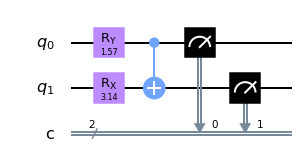

In [135]:
#initialisation of 2 qubit circuit
circuit = QuantumCircuit(2,2)

# noise model with probability 0.5% for each type of error
noise = noiseAdd(0.005,0.005) 
# Rx gate
phiRx = gradient(0.5, 0, 0.000001,0.001, gate = 'Rx')
circuit.rx(phiRx,1)
#Ry gate
phiRy = gradient(0.5, 0, 0.000001,0.001, gate = 'Ry')
circuit.ry(phiRy,0) 

# cnot gate
circuit.cx(0,1)
# measure and draw the circuit
circuit.measure([0,1],[0,1])
circuit.draw(output = 'mpl')


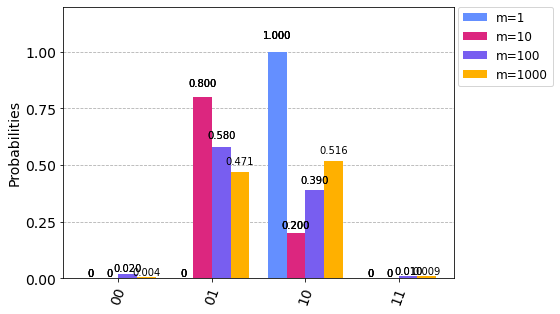

In [136]:
#plot the results for measurements 1, 10, 100 and 1000
backend = Aer.get_backend('qasm_simulator')

# executes the circuit 
out1 = execute(circuit, backend, shots = 1, noise_model = noise).result().get_counts()
out10 = execute(circuit, backend, shots = 10, noise_model = noise).result().get_counts()
out100 = execute(circuit, backend, shots = 100, noise_model = noise).result().get_counts()
out1000 = execute(circuit, backend, shots = 1000, noise_model = noise).result().get_counts()

#plots the output in a sngle histogram file
legends = ['m=1','m=10','m=100','m=1000']
plot_histogram([out1, out10, out100,out1000] ,legend = legends)


